In [102]:
import datetime

from pprint import pprint
import numpy as np
import pandas as pd
from numba import jit, f8, i8, i4, b1, void

import plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.graph_objs.scatter import Line
from plotly.graph_objs import Scatter

from scipy.io import loadmat
from sklearn.model_selection import train_test_split

In [103]:
mat = loadmat('ex5data1.mat')
X = mat['X']
y = mat['y']
Xtest = mat['Xtest']
ytest = mat['ytest']
Xval = mat['Xval']
yval = mat['yval']

X.shape, y.shape, Xtest.shape, ytest.shape, Xval.shape, yval.shape

((12, 1), (12, 1), (21, 1), (21, 1), (21, 1), (21, 1))

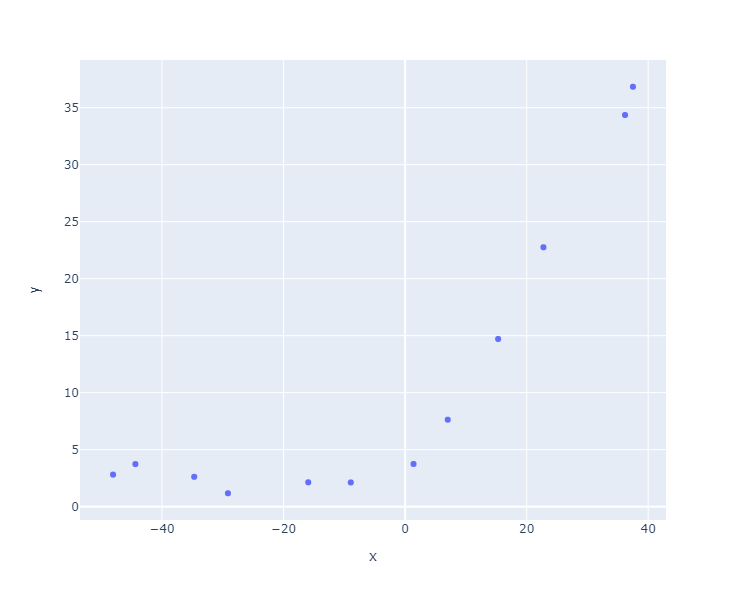

In [104]:
px.scatter(x=X.ravel(), y=y.ravel())

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

reg = Ridge(alpha=0)
reg.fit(X=X, y=y.ravel())

reg.intercept_, reg.coef_, reg

(13.08790351086908,
 array([0.36777923]),
 Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
       random_state=None, solver='auto', tol=0.001))

[[ 7.22669488]
 [ 2.36604327]
 [26.39766783]
 [26.87675129]
 [-4.58713577]
 [ 9.799421  ]
 [18.71779179]
 [ 0.3236598 ]
 [13.59880563]
 [-3.2355215 ]
 [15.6673239 ]
 [21.45956978]]


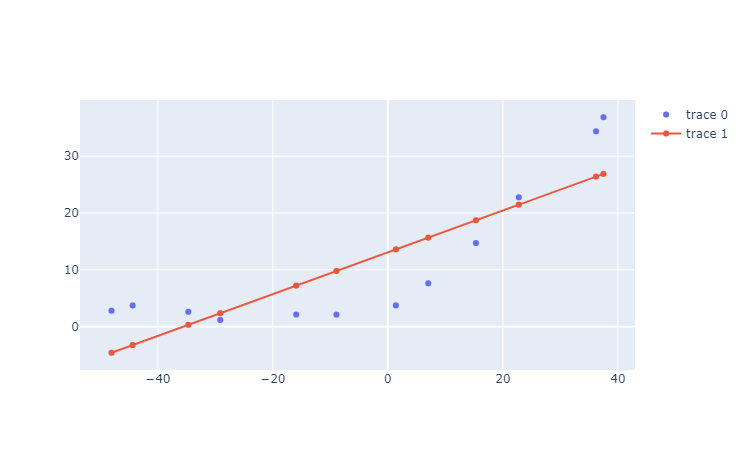

In [106]:
h = reg.coef_ * X + reg.intercept_;
print(h)
fig = go.Figure()
fig.add_trace(Scatter(x=X.ravel(), y=y.ravel(), mode='markers'))
fig.add_trace(Scatter(x=X.ravel(), y=h.ravel()))
fig.show()

(33, 1) (33, 1)
array([1, 2, 4, 6, 8])
array([[       nan,        nan,        nan],
       [1.        , 1.        , 1.        ],
       [0.62090753, 0.98032375, 0.98032375],
       [0.42551049, 0.80456216, 0.84488881],
       [0.5450875 , 0.76222899, 0.81926988]])
array([[-8.65851858e-01, -4.20759318e-01, -8.74832998e-01],
       [-1.03795463e+00, -6.35947312e-02, -4.05540918e-01],
       [ 2.53641723e-01, -2.67608500e+00, -9.19524835e-01],
       [-1.21477086e-04, -1.04332937e+00, -4.48900256e-01],
       [ 3.78835023e-01, -8.66786585e-01, -2.02629853e-01]])


c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



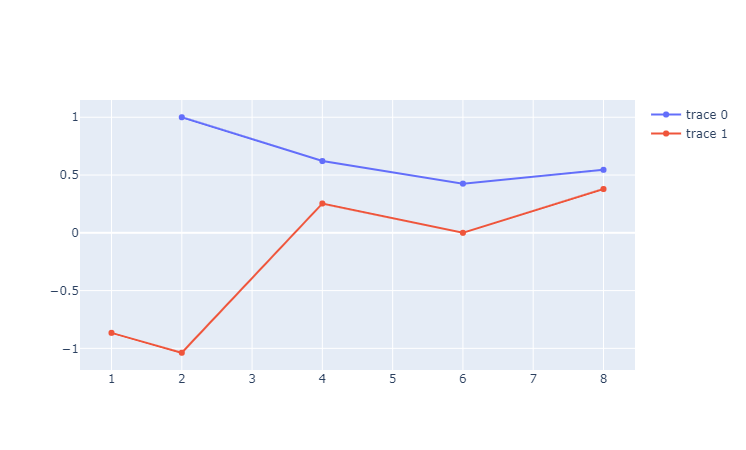

In [136]:
XX = np.r_[X, Xval]
yy = np.r_[y, yval]
print(XX.shape, yy.shape)
  
from sklearn.model_selection import learning_curve
sizes, train_scores, test_scores = learning_curve(reg, X, y, cv=3)

pprint(sizes)
pprint(train_scores)
pprint(test_scores)

fig = go.Figure()
fig.add_trace(Scatter(x=sizes, y=train_scores[:, 0].ravel()))
fig.add_trace(Scatter(x=sizes, y=test_scores[:, 0].ravel()))
fig.show()

In [165]:
def poly_feature(x, p):
    X_poly = x
    for i in range(2, p + 1):
        X_poly = np.c_[X_poly, x ** i]
    return X_poly

def feature_normalize(x):
    m = x.shape[0]
    sig = x.std(0)
    u = x.mean(0)
    x_norm = (x - u)/sig
    return x_norm
    
X_poly = poly_feature(XX, 8)
X_norm = feature_normalize(X_poly)
X_norm.shape


(33, 8)

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



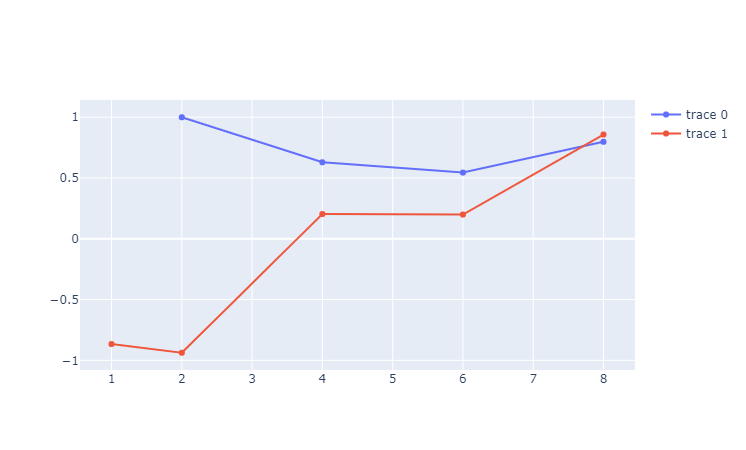

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



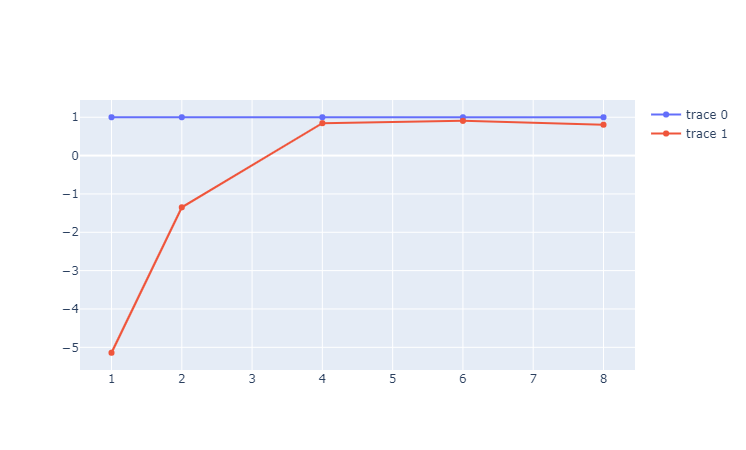

In [176]:
reg = Ridge()
reg.fit(X_poly, y)

from sklearn.model_selection import learning_curve
sizes, train_scores, test_scores = learning_curve(reg, X_poly, y, cv=3)

fig = go.Figure()
fig.add_trace(Scatter(x=sizes, y=train_scores[:, 0].ravel()))
fig.add_trace(Scatter(x=sizes, y=test_scores[:, 0].ravel()))
fig.show()

lambda_vec = np.logspace(-6, 4, 20)
train_scores, test_scores = validation_curve(
    regr, X_poly, y, "alpha", lambda_vec)

fig = go.Figure()
fig.add_trace(Scatter(x=sizes, y=train_scores[:, 0].ravel()))
fig.add_trace(Scatter(x=sizes, y=test_scores[:, 0].ravel()))
fig.show()

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.



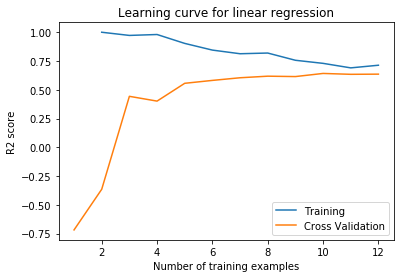

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning:

Singular matrix in solving dual problem. Using least-squares solution instead.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning:

Ill-conditioned matrix (rcond=4.71874e-17): result may not be accurate.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning:

Ill-conditioned matrix (rcond=4.08506e-17): result may not be accurate.

c:\users\aliyome\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning:

Ill-conditioned matrix (rcond=6.89272e-17): result may not be accurate.

c:\users\a

array([[-3.62141661e-01, -7.55085335e-01,  1.82226070e-01,
        -7.06189930e-01,  3.06618669e-01, -5.90878354e-01,
         3.44516727e-01, -5.08482182e-01],
       [-8.03205025e-01,  1.25958748e-03, -2.47937376e-01,
        -3.27022444e-01,  9.33962163e-02, -4.35817449e-01,
         2.55416446e-01, -4.48913020e-01],
       [ 1.37746589e+00,  5.84822151e-01,  1.24976580e+00,
         2.45306753e-01,  9.78356780e-01, -1.21603107e-02,
         7.56566370e-01, -1.70355886e-01],
       [ 1.42094081e+00,  7.06647885e-01,  1.35984794e+00,
         3.95535750e-01,  1.10616475e+00,  1.25638882e-01,
         8.71932297e-01, -5.96363180e-02],
       [-1.43414703e+00,  1.85399636e+00, -2.03715872e+00,
         2.33142500e+00, -2.41152954e+00,  2.60220405e+00,
        -2.64566649e+00,  2.76607683e+00],
       [-1.28687979e-01, -9.75968202e-01,  2.51385744e-01,
        -7.39687231e-01,  3.16953820e-01, -5.94997380e-01,
         3.45812768e-01, -5.08956377e-01],
       [ 6.80582299e-01, -7.800290

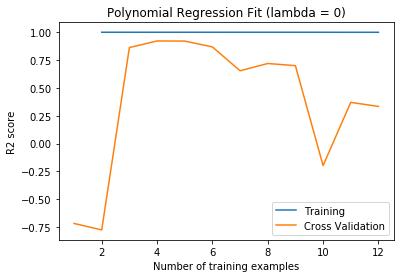

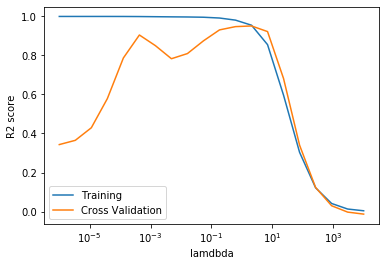

In [169]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve, validation_curve

# 無印＝訓練データ、val＝交差検証データ、test＝テストデータ
X = np.array([-15.9368,-29.1530,36.1895,37.4922,-48.0588,-8.9415,15.3078,-34.7063,1.3892,-44.3838,7.0135,22.7627])
Xtest = np.array([-33.3180,-37.9122,-51.2069,-6.1326,21.2612,-40.3195,-14.5415,32.5598,13.3934,44.2099,-1.1427,-12.7669,34.0545,39.2235,1.9745,29.6218,-23.6696,-9.0118,-55.9406,-35.7086,9.5102])
Xval = np.array([-16.7465,-14.5775,34.5158,-47.0101,36.9751,-40.6861,-4.4720,26.5336,-42.7977,25.3741,-31.1096,27.3118,-3.2639,-1.8183,-40.7197,-50.0132,-17.4118,3.5882,7.0855,46.2824,14.6123])
y = np.array([2.1343,1.1733,34.3591,36.8380,2.8090,2.1211,14.7103,2.6142,3.7402,3.7317,7.6277,22.7524])
ytest = np.array([3.31689,5.39769,0.13043,6.19260,17.08849,0.79951,2.82479,28.62123,17.04639,55.38437,4.07937,8.27040,31.32355,39.15906,8.08728,24.11134,2.47735,6.56606,6.03809,4.69274,10.83005])
yval = np.array([4.1702e+000,4.0673e+000,3.1873e+001,1.0624e+001,3.1836e+001,4.9594e+000,4.4516e+000,2.2276e+001,-4.3874e-005,2.0504e+001,3.8583e+000,1.9365e+001,4.8838e+000,1.1097e+001,7.4617e+000,1.4769e+000,2.7192e+000,1.0927e+001,8.3487e+000,5.2782e+001,1.3357e+001])

# Scikit-learnのドキュメントにきれいなのがある
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

# trainとCVをくっつける（組み込みでは分ける必要はない）
Xjoin = np.r_[X, Xval].reshape(-1, 1)
yjoin = np.r_[y, yval]
# 交差検証、訓練を分けるインデックスのジェネレーターを生成する関数を作る
def gen_cv(): 
    trainIndices = np.arange(len(y))
    testIndices = np.arange(len(y), len(y)+len(yval))
    yield (trainIndices, testIndices)

## 通常のLearning Curve
lambda_ = 0
regr = Ridge(alpha = lambda_)
# 訓練データのサイズは割合でも指定できるし、絶対数でもOK
train_sizes, train_scores, test_scores = learning_curve(
        regr, Xjoin, yjoin, cv=gen_cv(), train_sizes=np.arange(len(y))+1)
plt.plot(train_sizes, train_scores, label="Training")
plt.plot(train_sizes, test_scores, label="Cross Validation")
plt.xlabel("Number of training examples")
plt.ylabel("R2 score")
plt.title("Learning curve for linear regression")
plt.legend()
plt.show()

#多項式化
def map_feature(X, p):
    m = X.shape[0]
    ret = np.zeros((m, p))
    for i in range(p):
        ret[:, i] = X ** (i+1)
    # 標準化
    mu = np.mean(ret, axis=0)
    sigma = np.std(ret, axis=0, ddof=1)#不偏分散で推定
    norm = (ret - mu) / sigma
    return norm, mu, sigma, ret
def map_feature_with_normalize(X, mu, sigma):
    p = len(mu)
    norm, d1, d2, poly = map_feature(X, p) #poly以外いらないので捨てる
    return (poly - mu) / sigma
p = 8
X_poly, mu, sigma, dummy = map_feature(X, p)

pprint(X_poly)


X_poly_test = map_feature_with_normalize(Xtest, mu, sigma)
X_poly_val = map_feature_with_normalize(Xval, mu, sigma)
X_poly_join = np.r_[X_poly, X_poly_val]

# 多項式版の学習曲線
lambda_ = 0
regr = Ridge(alpha = lambda_)
train_sizes, train_scores, test_scores = learning_curve(
        regr, X_poly_join, yjoin, cv=gen_cv(), train_sizes=np.arange(len(y))+1)
plt.plot(train_sizes, train_scores, label="Training")
plt.plot(train_sizes, test_scores, label="Cross Validation")
plt.xlabel("Number of training examples")
plt.ylabel("R2 score")
plt.title(f"Polynomial Regression Fit (lambda = {lambda_})")
plt.legend()
plt.show()

# 多項式版の検証曲線
lambda_vec = np.logspace(-6, 4, 20)
train_scores, test_scores = validation_curve(
    regr, X_poly_join, yjoin, "alpha", lambda_vec, cv=gen_cv())
plt.semilogx(lambda_vec, train_scores, label="Training")
plt.semilogx(lambda_vec, test_scores, label="Cross Validation")
plt.xlabel("lamdbda")
plt.ylabel("R2 score")
plt.legend()
plt.show()